# COMP 2002 - Intro to AI
## Week 2 - Machine Learning Exercises

## Exercise 1 - Classify the Iris Data

### Import Libraries

Matplotlib for plotting
sklearn for the dataset and K Nearest Neighbors Classifier

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

### Load the Iris Data

In [2]:
data = load_iris()
inputs = data.data
targets = data.target

### Use Princibal Component Analysis (PCA) to reduce the dimensionality of the data

The iris data has 4 dimensions, PCA can be used to reduce this down to 2 dimensions

The PCA algorithm finds the pricipal components of the data and tranforms them to fit a lower number of dimensions, in this case 2 (as its easy to graph for visualisation).

The pricipal components are the data features which corrispond to the most variance in the data The first PC explains the most, the 2nd PC explains a bit less, the 3rd even less, and so on.

In [3]:
pca = PCA(n_components=2)
compressed = pca.fit_transform(inputs)

### Train the classifier
#### K Nearest Neighbors (kNN)

We will be using the K nearest neighbors  classifier to classify the iris data, this works well for this dataset as its pretty well grouped, kNN *generally* isnt a very useful for classification

kNN is given a set of points with known classes, and then a new point of unknown class is added. kNN then looks at the nearest k points to this new point, it counts up the number of points belonging to each class and whichever class has the largest proportion of points defines the class of the unknown point.

For the iris data we are using a k value of 10. This value is found by trial and error, and the value of 10 works well for the iris data.

What happens if there are the same number of points???



In [4]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(inputs, targets)
classifiedData = classifier.predict(inputs)

### Plot the results

We will now plot the results, each color represents a different class (as defined by kNN)

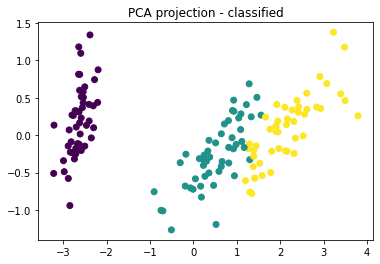

In [5]:
# Plot the results.
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=classifiedData)
plt.title("PCA projection - classified")
#plt.savefig("iris_pca_classified.png", bbox_inches="tight")
plt.show()

## Exercise 2 - Loading the Iris data with Pandas

We will now extract the data from a CSV file (iris.csv) and format it so we can use the same kNN and plot code from above

You'll need to import pandas for this

In [1]:
import pandas as pandas

data = pandas.read_csv("Data/wk2/iris.csv")

print(data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


### Extract the data

In [7]:
# Extract the inputs.
inputs = data.values[:,:-1].astype(float)

# Extract the targets - convert to numerical values to help with
# colouring when we plot the results.
cls = ["Setosa", "Versicolor", "Virginica"]
targets = [cls.index(c) for c in data.values[:,-1].astype(str)]
targets = np.array(targets)

## Exercice 3 - Classify the digits data

We will now classify the [digits data](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) using PCA and kNN

This uses the dataset from [here](https://data.world/nrippner/mnist-handwritten-digits) instead of the sklearn dataset (mostly because its bigger, and bigger is always more fun)

First we will import the required libraries.

In [3]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Load and Format the Data

In [4]:
trainData = pd.read_csv("Data/wk2/trainData.csv")
trainTargets = pd.read_csv("Data/wk2/trainTargets.csv")
testData = pd.read_csv("Data/wk2/testData.csv")
testTargets = pd.read_csv("Data/wk2/testTargets.csv")

#got to do this to format it correctly for the plotting, training ect
trainTargets = trainTargets.column_0
testTargets = testTargets.column_0

### Reduce the dimensionality

The data has 784 dimensions (+ the Label) across 60k sample. So to have any change of being able to understand this data (with a sensible amount of compute) we need to reduce its dimensionality. We will do this with PCA, the same as the iris data above.  

In [68]:
print("Number of Dimensions: ", trainData.shape)

Number of Dimensions:  (60000, 784)


In [106]:
pca = PCA(10)
trainDataPCA = pca.fit_transform(trainData)

print(trainData.shape)
print(trainDataPCA.shape)

(60000, 784)
(60000, 10)


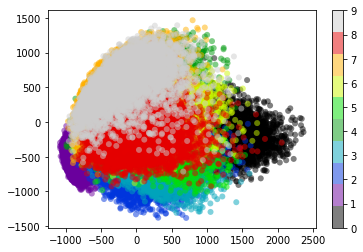

In [107]:
# Creating a scatter plot of the datapoints
plt.scatter(trainDataPCA[:, 0], trainDataPCA[:, 1], c=trainTargets, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap("nipy_spectral",10))
plt.colorbar();

### PCA Value of 10

From the above scatter plot we can see that you can roughly classify the data using only 10 dimensions. But we should probably check to see if there is an optimal number of dimensions for this data that give both good accuracy and reduced compute compared to the full dataset.

### How many dimensions should we reduce it to?

The plot bellow shows cumulative explained varience for different number of dimensions (ie pricipal components)

Cumulative varience is the percentace (in this case expressed as a decimal) of the varience in the data that can be expressed with a number of dimensions. The larger the number of dimensions, the larger the amount of varience that can be expressed. 95% is a good aim, this is near the top of the slope, but not so close it requires vastly more compute than a smaller value.

From this graph we can see that somewhere around 200 dimensions is a good choice for this data.

Text(0, 0.5, 'Cumulative Explained Variance')

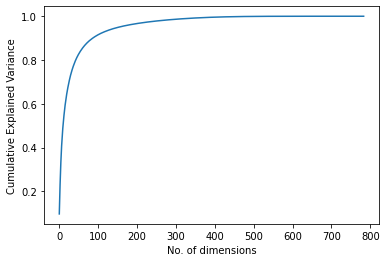

In [71]:
pca=PCA().fit(trainData)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of dimensions')
plt.ylabel('Cumulative Explained Variance')

### Recreating the PCA and Scatter Plots with the new dimension value

Here we are recalculating our PCA with a new value based of the CEV analysis, we then create a new scatter plot

***Why does the plot look exactly the same compared to a PCA of 10 dimensions?***

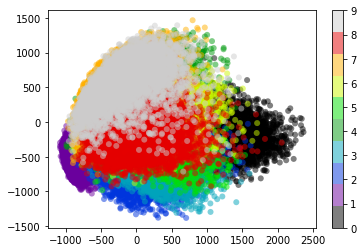

In [72]:
pca = PCA(200)  
pixelDataPCA = pca.fit_transform(trainData)

plt.scatter(trainDataPCA[:, 0], trainDataPCA[:, 1], c=trainTargets, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap("nipy_spectral",10))
plt.colorbar();

### Train the kNN Classifier

Here we train the classifer on the training data, using a k value of 10. And then use that classifer to make predictions on the test data.

We also need to transform the test data using PCA, using the same optimum value of 200 as before.

In [97]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(trainData, trainTargets)

### Make some predictions with the trained classifier

In [108]:
classifiedData = classifier.predict(testData)

### Test Data Plot

***Why is is reflected horrizontally?***

In [109]:
pca = PCA(200)  
testDataPCA = pca.fit_transform(testData)

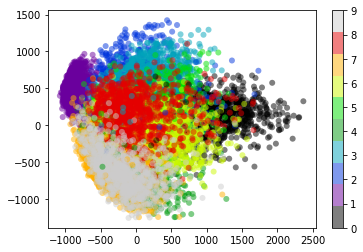

In [110]:
plt.scatter(pixelTestDataPCA[:, 0], pixelTestDataPCA[:, 1], c=classifiedData, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap("nipy_spectral",10))
plt.colorbar();

### Score with k of 10

This is the % of correct classifications that were made on the test data with a k value of 10

In [100]:
print(classifier.score(testData, testTargets)*100, "%")

96.65 %


### What value of k?

10 might not be the optimal value of k, so we need to do some analysis to find out what is. 

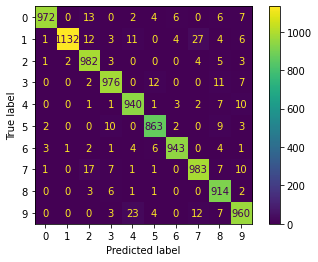

In [103]:
cm = confusion_matrix(classifiedData,testTargets)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Retraining the classifier with the optimal k value

As it turns out 10 is a pretty good value for k, it gives >96% accuracy on the test data and the confusion matrix shows that is pretty consistent across the board, with no obvious errors.